<Axes: xlabel='x', ylabel='y'>

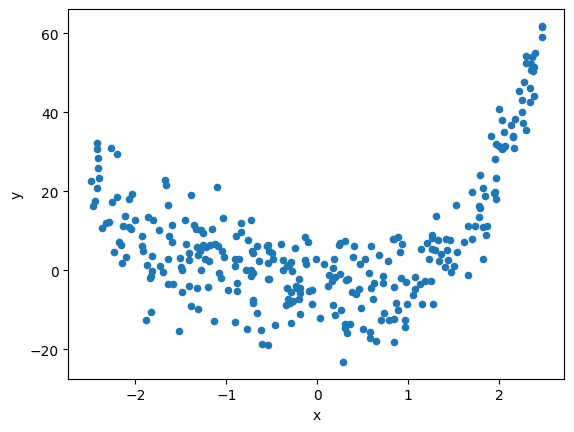

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
size = 300
X = np.random.rand(size)*5-2.5  # to znaczy ze zmienna x jest  wzakresie (-2.5 , 2,5)
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.to_csv('dane_do_regresji.csv', index=None)
df.plot.scatter(x='x', y='y' )


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.reshape(-1, 1), y, test_size=0.2, random_state=42)
# X.reshape jest dletego ze skikit-learn wymaga aby dane wejsciowe mialy kszatlt (n,1), czyli wektor pioneowy


In [ ]:
# regresja liniowa
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print(lin_reg.intercept_, lin_reg.coef_)
# y = a1x + b
# intercept to b (punkt przeciecia z osia Y)
# coef to a1 (wspoclznnik nachylenia prostej)
# 7.153510440990983 [2.94550059]

y_pred_train_lin = lin_reg.predict(X_train)
y_pred_test_lin = lin_reg.predict(X_test)

train_mse_lin = mean_squared_error(y_train, y_pred_train_lin)
test_mse_lin = mean_squared_error(y_test, y_pred_test_lin)
print(train_mse_lin, test_mse_lin)

df_mse = pd.DataFrame(
    {
        "train_mse" : [train_mse_lin],
        "test_mse" : [test_mse_lin]
    }, index=["lin_reg"]
)

print(df_mse)



7.023769941757078 [4.093641]
241.2409554307601 226.86283943590888
          train_mse    test_mse
lin_reg  241.240955  226.862839


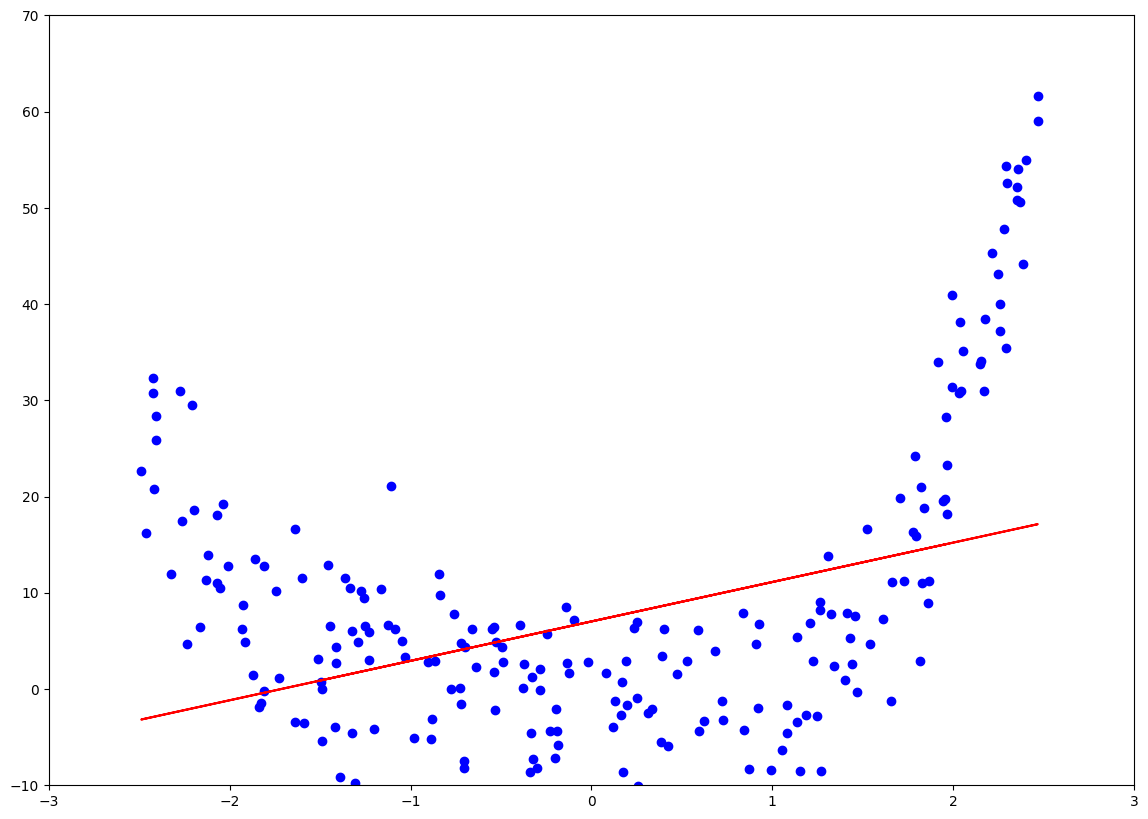

In [ ]:
y_pred = lin_reg.predict(X_train.reshape(-1,1))

import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, y_pred, color='red')
plt.xlim(-3, 3)
plt.ylim(-10, 70)
plt.show()

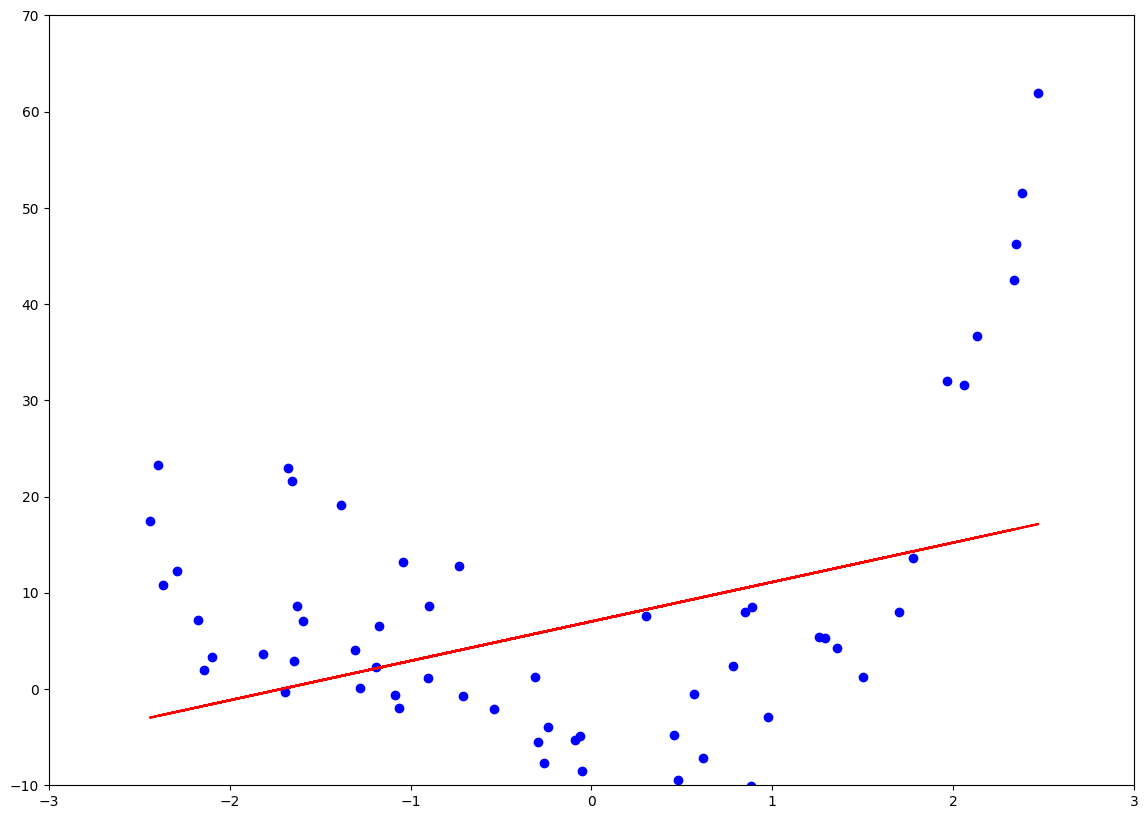

In [ ]:
y_pred = lin_reg.predict(X_test.reshape(-1,1))

import matplotlib.pyplot as plt


plt.figure(figsize=(14,10))
plt.scatter(X_test, y_test, color="blue")
plt.plot(X_test, y_pred, color='red')
plt.xlim(-3, 3)
plt.ylim(-10, 70)
plt.show()


33.92397528546631 84.318080238999
            train_mse    test_mse
lin_reg    241.240955  226.862839
knn_3_reg   33.923975   84.318080


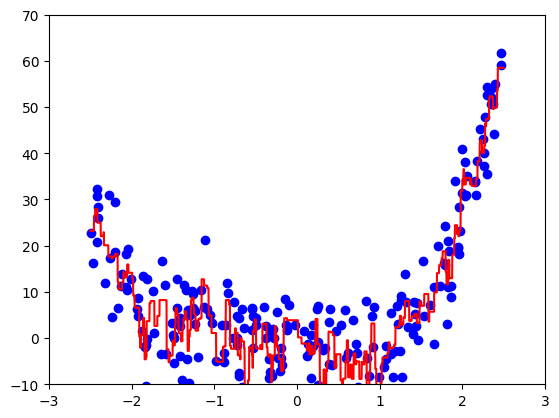

In [ ]:
# KNN dla k=3
import sklearn.neighbors

knn_reg3 = sklearn.neighbors.KNeighborsRegressor(
    n_neighbors=3
)

knn_reg3.fit(X_train, y_train)

y_train_pred_kNN3 = knn_reg3.predict(X_train)
y_test_pred_kNN3 = knn_reg3.predict(X_test)

mse_train_knn3 = mean_squared_error(y_train, y_train_pred_kNN3)
mse_test_knn3 = mean_squared_error(y_test, y_test_pred_kNN3)

print(mse_train_knn3, mse_test_knn3)

df_mse.loc["knn_3_reg"] = [mse_train_knn3, mse_test_knn3]

print(df_mse)




X_new1 = np.arange(-2.5, 2.5, 0.001).reshape(-1,1)
y_pred = knn_reg3.predict(X_new1.reshape(-1,1))



plt.clf()
plt.scatter(X_train, y_train, c="blue")
# plt.scatter(X_test, y_test, c="blue")
plt.plot(X_new1, y_pred, c="red")
plt.xlim(-3, 3)
plt.ylim(-10, 70)
plt.show()



43.11232751353675 80.55922213248203
            train_mse    test_mse
lin_reg    241.240955  226.862839
knn_3_reg   33.923975   84.318080
knn_5_reg   43.112328   80.559222


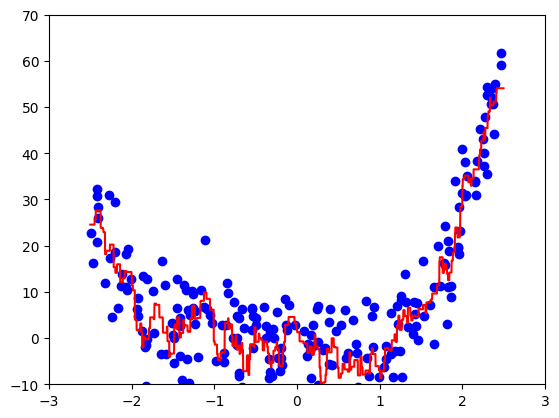

In [ ]:
# KNN dla k=5
import sklearn.neighbors

knn_reg5 = sklearn.neighbors.KNeighborsRegressor(
    n_neighbors=5
)

knn_reg5.fit(X_train, y_train)

y_train_pred_knn5 = knn_reg5.predict(X_train)
y_test_pred_knn5 = knn_reg5.predict(X_test)

mse_train_knn5 = mean_squared_error(y_train, y_train_pred_knn5)
mse_test_knn5 = mean_squared_error(y_test, y_test_pred_knn5)

print(mse_train_knn5, mse_test_knn5)

df_mse.loc["knn_5_reg"] = [mse_train_knn5, mse_test_knn5]

print(df_mse)



X_new2 = np.arange(-2.5, 2.5, 0.001).reshape(-1,1)
y_pred2 = knn_reg5.predict(X_new2.reshape(-1,1))

plt.clf()
plt.scatter(X_train, y_train, c="blue")
# plt.scatter(X_test, y_pred, c="blue")
plt.plot(X_new2, y_pred2, c = "red")
plt.xlim(-3, 3)
plt.ylim(-10, 70)
plt.show()

[-1.48884259] [-1.48884259  2.21665225]
-6.675833318854191 [3.44782706 6.81447586]
81.7168741897804 78.78124130595083
             train_mse    test_mse
lin_reg     241.240955  226.862839
knn_3_reg    33.923975   84.318080
knn_5_reg    43.112328   80.559222
poly_2_reg   81.716874   78.781241


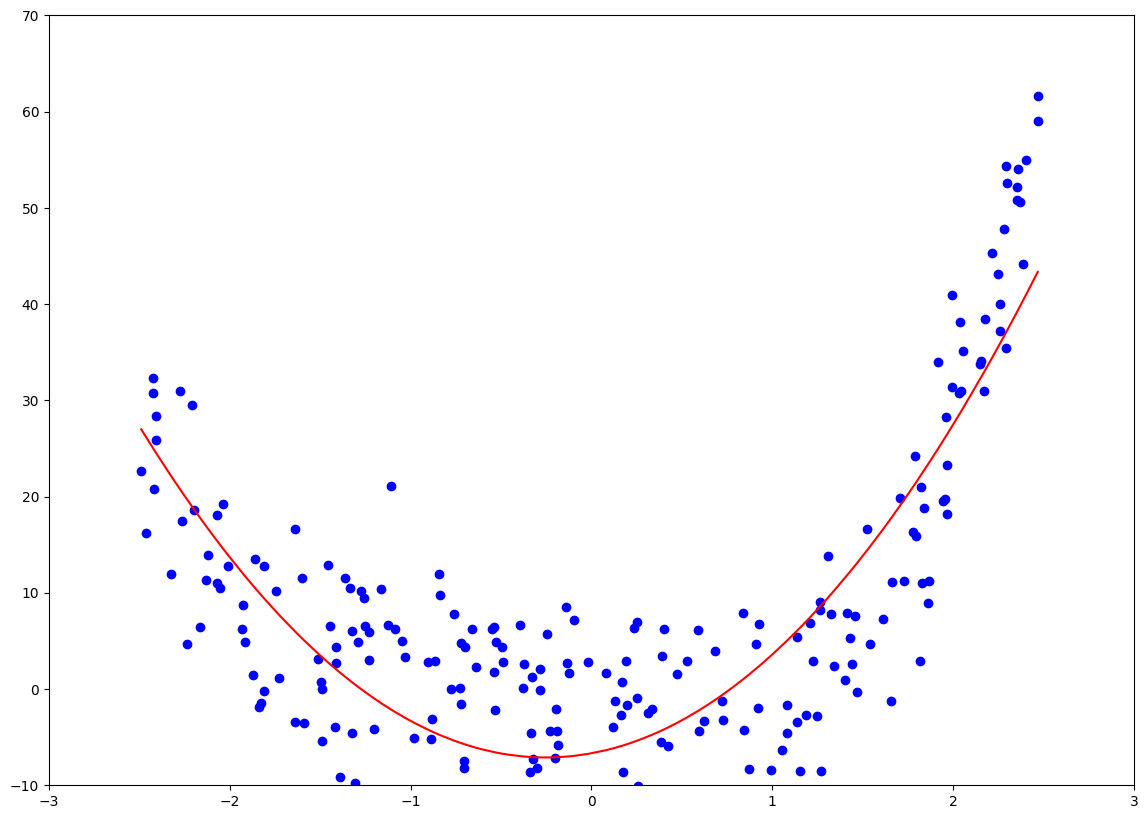

In [ ]:
# wielomianowa degree = 2
from sklearn.preprocessing import PolynomialFeatures

poly_features2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly2 = poly_features2.fit_transform(X_train)
print(X_train[0], X_poly2[0])
# [-1.0567527] [-1.0567527   1.11672627]
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly2, y_train)
print(lin_reg2.intercept_, lin_reg2.coef_)


y_train_pred_w2 = lin_reg2.predict(X_poly2)
y_test_pred_w2 = lin_reg2.predict(poly_features2.transform(X_test))

mse_train_w2 = mean_squared_error(y_train, y_train_pred_w2)
mse_test_w2 = mean_squared_error(y_test, y_test_pred_w2)

print(mse_train_w2, mse_test_w2)

df_mse.loc["poly_2_reg"] = [mse_train_w2, mse_test_w2]

print(df_mse)


# X_test_poly2 = poly_features2.transform(X_test)
# y_pred = lin_reg2.predict(X_test_poly2)

y_pred2 = lin_reg2.predict(X_poly2)

sort_idx = np.argsort(X_train[:, 0])
X_train_sorted = X_train[sort_idx]
y_pred2_sorted = y_pred2[sort_idx]

plt.figure(figsize=(14,10))
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train_sorted, y_pred2_sorted, color='red')
plt.xlim(-3, 3)
plt.ylim(-10, 70)
plt.show()




[-1.48884259] [-1.48884259  2.21665225 -3.30024628]
-6.841485618538244 [-3.07384556  6.78099992  1.75098711]
65.2277579044768 51.09111288763805
             train_mse    test_mse
lin_reg     241.240955  226.862839
knn_3_reg    33.923975   84.318080
knn_5_reg    43.112328   80.559222
poly_2_reg   81.716874   78.781241
poly_3_reg   65.227758   51.091113


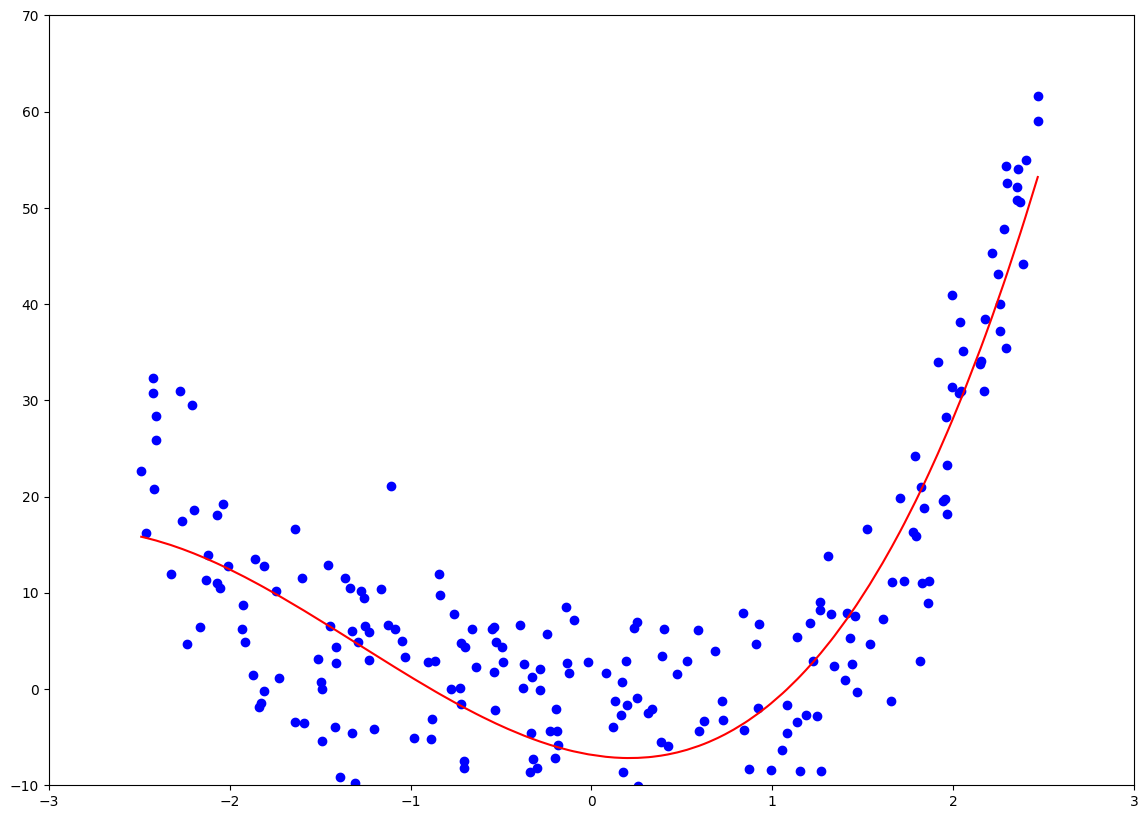

In [ ]:
# wielomianowa degree = 3

poly_features3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly3 = poly_features3.fit_transform(X_train)
print(X_train[0], X_poly3[0])
lin_reg3 = LinearRegression()
lin_reg3.fit(X_poly3, y_train)
print(lin_reg3.intercept_, lin_reg3.coef_)

# X_test_poly3 = poly_features3.transform(X_test)
# y_pred = lin_reg3.predict(X_test_poly3)

y_train_pred_w3 = lin_reg3.predict(X_poly3)
y_test_pred_w3 = lin_reg3.predict(poly_features3.transform(X_test))

mse_train_w3 = mean_squared_error(y_train, y_train_pred_w3)
mse_test_w3 = mean_squared_error(y_test, y_test_pred_w3)

print(mse_train_w3, mse_test_w3)

df_mse.loc["poly_3_reg"] = [mse_train_w3, mse_test_w3]

print(df_mse)



X_train_poly3 = poly_features3.transform(X_train)
y_pred3 = lin_reg3.predict(X_train_poly3)

sort_idx = np.argsort(X_train[:, 0])
X_train_sorted = X_train[sort_idx]
y_pred3_sorted = y_pred3[sort_idx]

plt.figure(figsize=(14,10))
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train_sorted, y_pred3_sorted, color='red')
plt.xlim(-3, 3)
plt.ylim(-10, 70)
plt.show()


[-1.48884259] [-1.48884259  2.21665225 -3.30024628  4.91354722]
-3.281299810056047 [-3.18692335  0.78865471  1.776043    1.13257167]
54.433010411260526 56.85251865827236
             train_mse    test_mse
lin_reg     241.240955  226.862839
knn_3_reg    33.923975   84.318080
knn_5_reg    43.112328   80.559222
poly_2_reg   81.716874   78.781241
poly_3_reg   65.227758   51.091113
poly_4_reg   54.433010   56.852519


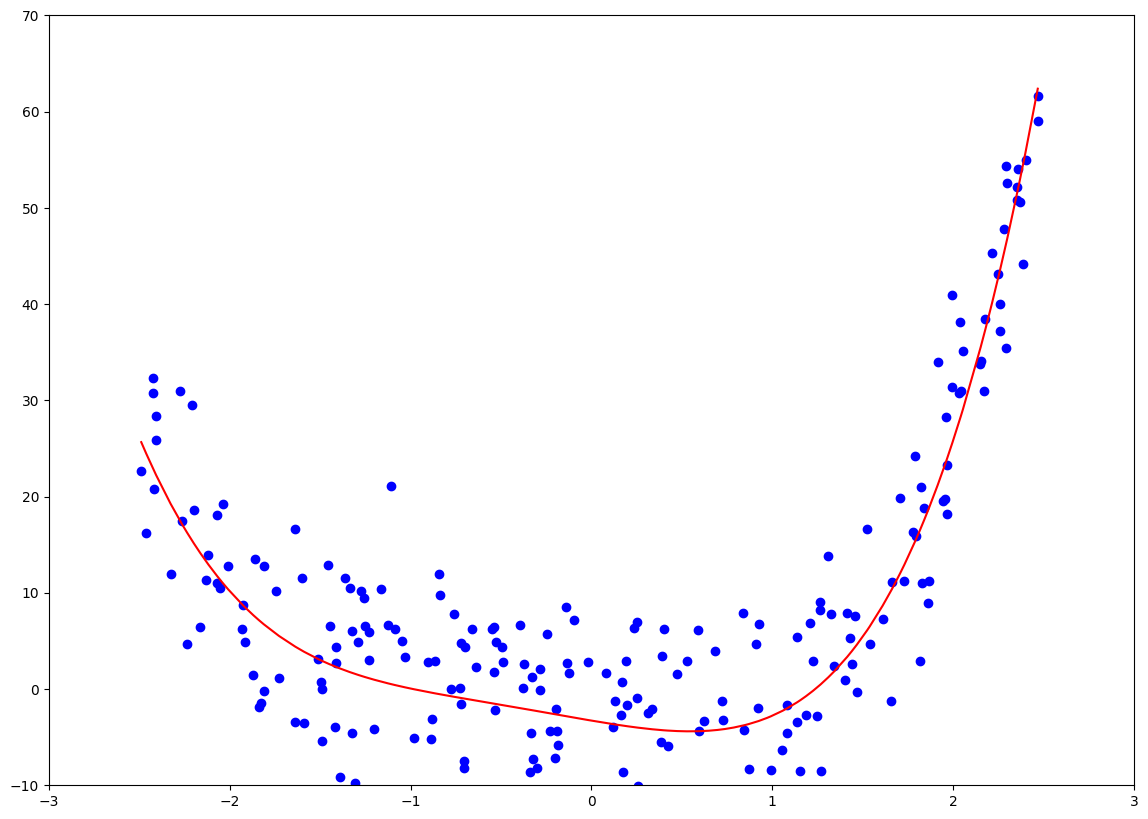

In [ ]:
# wielomianowa degree = 4

poly_features4 = PolynomialFeatures(degree=4, include_bias=False)
X_poly4 = poly_features4.fit_transform(X_train)
print(X_train[0], X_poly4[0])
lin_reg4 = LinearRegression()
lin_reg4.fit(X_poly4, y_train)
print(lin_reg4.intercept_, lin_reg4.coef_)

# X_test_poly4 = poly_features4.transform(X_test)
# y_pred = lin_reg4.predict(X_test_poly4)

y_train_pred_w4 = lin_reg4.predict(X_poly4)
y_test_pred_w4 = lin_reg4.predict(poly_features4.transform(X_test))

mse_train_w4 = mean_squared_error(y_train, y_train_pred_w4)
mse_test_w4 = mean_squared_error(y_test, y_test_pred_w4)

print(mse_train_w4, mse_test_w4)

df_mse.loc["poly_4_reg"] = [mse_train_w4, mse_test_w4]

print(df_mse)


X_train_poly4 = poly_features4.transform(X_train)
y_pred4 = lin_reg4.predict(X_train_poly4)

sort_idx = np.argsort(X_train[:, 0])
X_train_sorted = X_train[sort_idx]
y_pred4_sorted = y_pred4[sort_idx]

plt.figure(figsize=(14,10))
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train_sorted, y_pred4_sorted, color='red')
plt.xlim(-3, 3)
plt.ylim(-10, 70)
plt.show()


[-1.48884259] [-1.48884259  2.21665225 -3.30024628  4.91354722 -7.31549836]
-3.340973963153794 [-5.47878902  0.84329316  3.52777096  1.11996882 -0.25553704]
53.55061568470429 57.7841486111988
             train_mse    test_mse
lin_reg     241.240955  226.862839
knn_3_reg    33.923975   84.318080
knn_5_reg    43.112328   80.559222
poly_2_reg   81.716874   78.781241
poly_3_reg   65.227758   51.091113
poly_4_reg   54.433010   56.852519
poly_5_reg   53.550616   57.784149


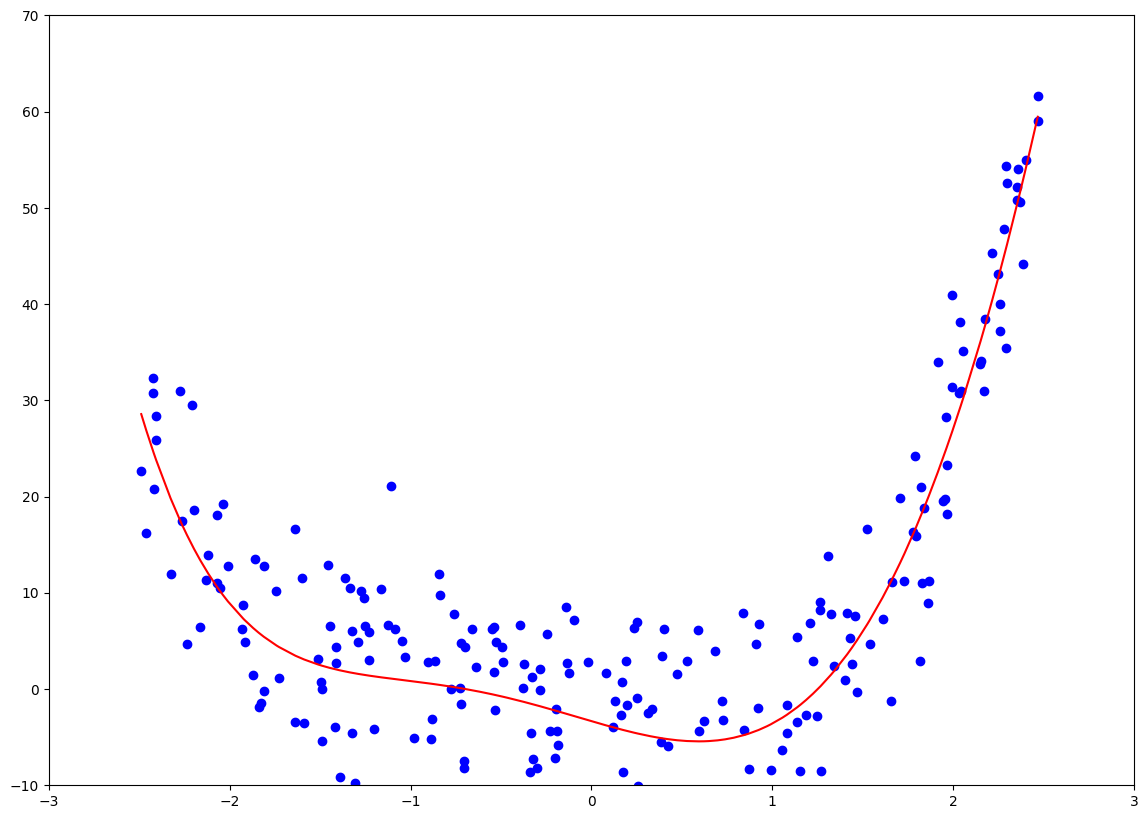

In [ ]:
# wielomianowa degree = 5

poly_features5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly5 = poly_features5.fit_transform(X_train)
print(X_train[0], X_poly5[0])
lin_reg5 = LinearRegression()
lin_reg5.fit(X_poly5, y_train)
print(lin_reg5.intercept_, lin_reg5.coef_)

y_train_pred_w5 = lin_reg5.predict(X_poly5)
y_test_pred_w5 = lin_reg5.predict(poly_features5.transform(X_test))

mse_train_w5 = mean_squared_error(y_train, y_train_pred_w5)
mse_test_w5 = mean_squared_error(y_test, y_test_pred_w5)

print(mse_train_w5, mse_test_w5)

df_mse.loc["poly_5_reg"] = [mse_train_w5, mse_test_w5]

print(df_mse)



# X_test_poly3 = poly_features3.transform(X_test)
# y_pred = lin_reg3.predict(X_test_poly3)

y_pred5 = lin_reg5.predict(X_poly5)

sort_idx = np.argsort(X_train[:, 0])
X_train_sorted = X_train[sort_idx]
y_pred5_sorted = y_pred5[sort_idx]


plt.figure(figsize=(14,10))
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train_sorted, y_pred5_sorted, color='red')
plt.xlim(-3, 3)
plt.ylim(-10, 70)
plt.show()



In [ ]:
df_mse.to_pickle("mse.pkl")

In [ ]:
import pickle

reg_list = [
    (lin_reg, None),
    (knn_reg3, None),
    (knn_reg5, None),
    (lin_reg2, poly_features2),
    (lin_reg3, poly_features3),
    (lin_reg4, poly_features4),
    (lin_reg5, poly_features5)
]

print(reg_list)

with open("reg.pkl", "wb") as file_reg:
  pickle.dump(reg_list, file_reg)


[(LinearRegression(), None), (KNeighborsRegressor(n_neighbors=3), None), (KNeighborsRegressor(), None), (LinearRegression(), PolynomialFeatures(include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=3, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=4, include_bias=False)), (LinearRegression(), PolynomialFeatures(degree=5, include_bias=False))]
